# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [3]:
# Import essential libraries for data manipulation and analysis

import pandas as pd
import numpy as np


import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer


from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm



## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [16]:
# Importing the file porter_data_1.csv
df = pd.read_csv("porter_data_1.csv")
df.head()


market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [17]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])


##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [18]:
# Convert categorical features to category type

cat_cols = ['market_id', 'store_primary_category', 'order_protocol']

for col in cat_cols:
    df[col] = df[col].astype('category')


#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [19]:
# Calculate time taken in minutes
df['time_taken'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [20]:
# Extract the hour and day of week from the 'created_at' timestamp

df['order_hour'] = df['created_at'].dt.hour
df['order_day'] = df['created_at'].dt.dayofweek
# Create a categorical feature 'isWeekend'

df['isWeekend'] = df['order_day'].apply(lambda x: 1 if x >= 5 else 0)

In [21]:
# Drop unnecessary columns
df = df.drop(['created_at', 'actual_delivery_time'], axis=1)


#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [22]:
# Define target variable (y) and features (X)

y = df['time_taken']       
X = df.drop('time_taken', axis=1)




##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [33]:
# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

train_df = pd.concat([X_train, y_train], axis=1)
train_df.columns


Index(['market_id', 'store_primary_category', 'order_protocol', 'total_items',
       'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'order_hour', 'order_day',
       'isWeekend', 'time_taken'],
      dtype='object')

## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [27]:
# Define numerical and categorical columns for easy EDA and data manipulation

num_cols = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

if 'time_taken' in num_cols:
    num_cols.remove('time_taken')
    
cat_cols = train_df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numerical Columns:", num_cols)
print("Categorical Columns:", cat_cols)

Numerical Columns: ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'isWeekend']
Categorical Columns: ['market_id', 'store_primary_category', 'order_protocol']


##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

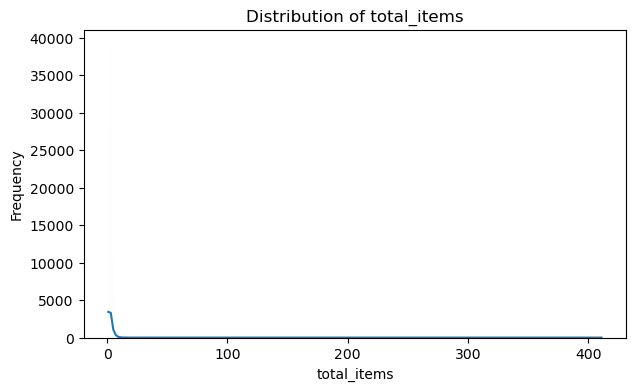

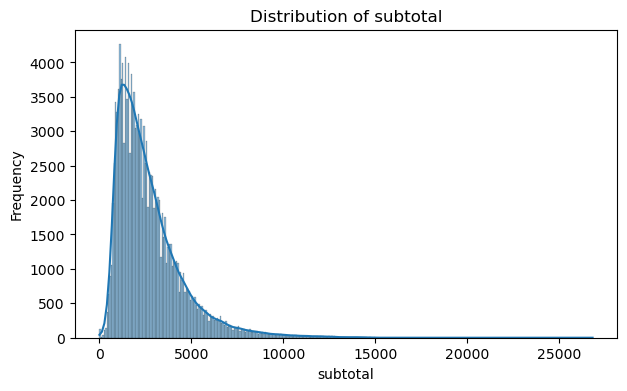

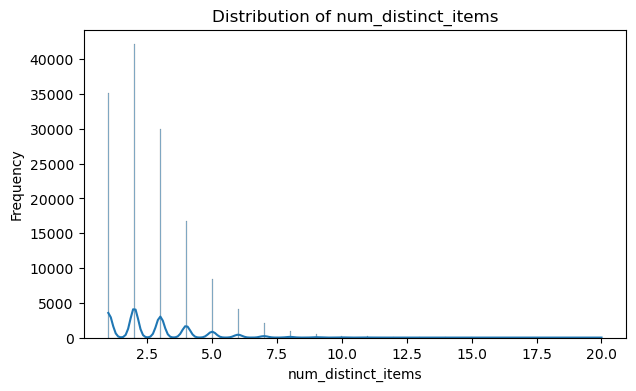

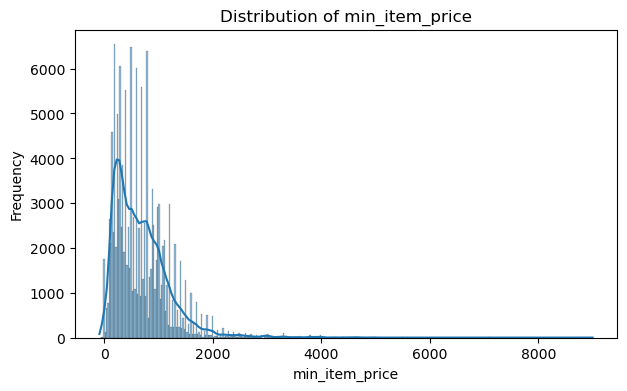

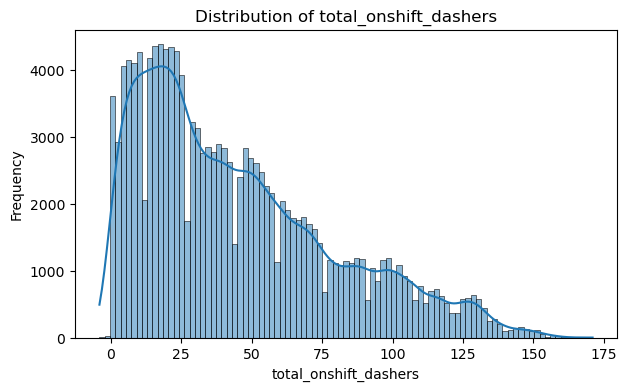

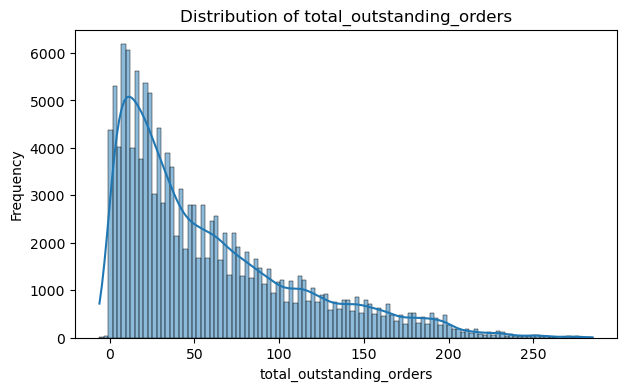

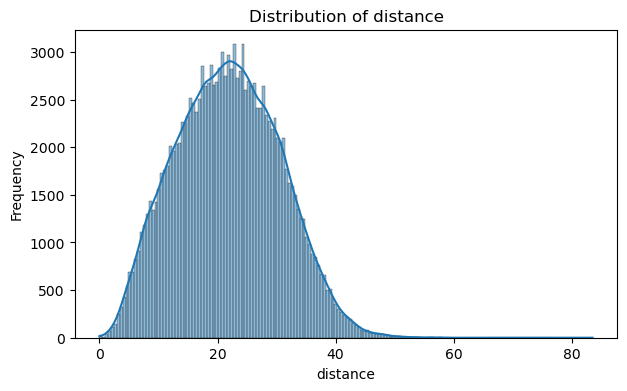

In [28]:
# Plot distributions for all numerical columns

for col in num_cols:
    plt.figure(figsize=(7,4))
    sns.histplot(train_df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

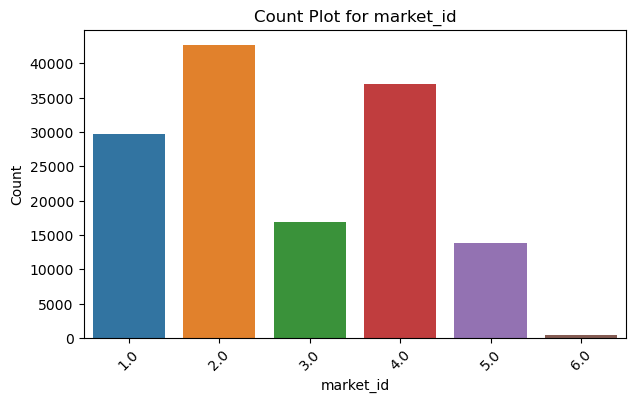

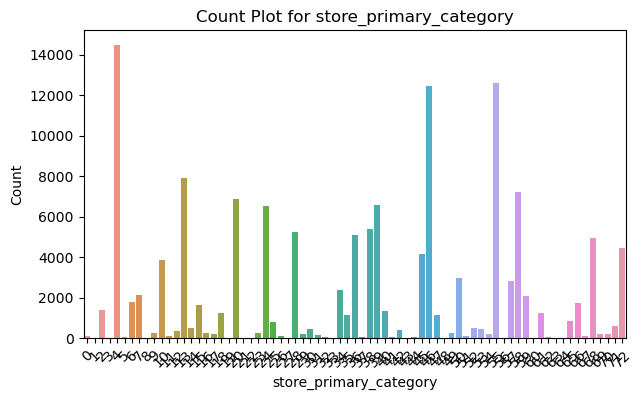

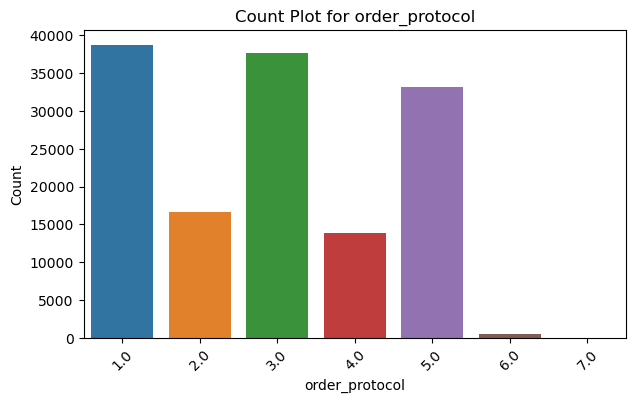

In [29]:
# Distribution of categorical columns

for col in cat_cols:
    plt.figure(figsize=(7,4))
    sns.countplot(data=train_df, x=col)
    plt.title(f"Count Plot for {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

In [30]:
# Distribution of time_taken
plt.figure(figsize=(7,4))
sns.histplot(train_df['time_taken'], kde=True)
plt.title("Distribution of time_taken")
plt.xlabel("time_taken")
plt.ylabel("Frequency")
plt.show()



#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

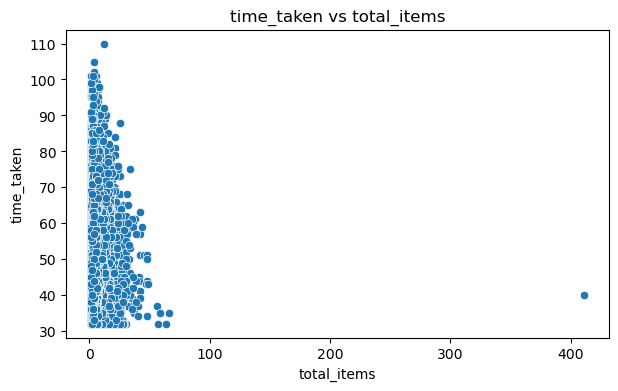

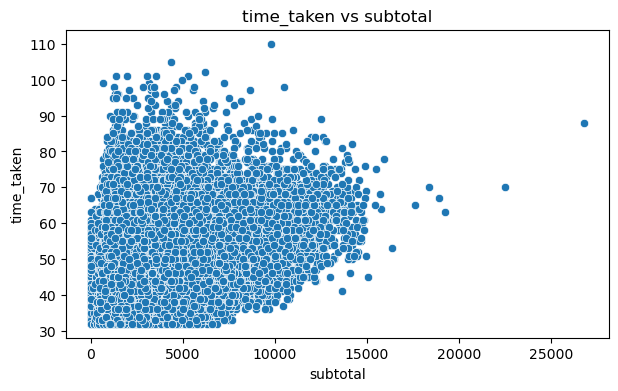

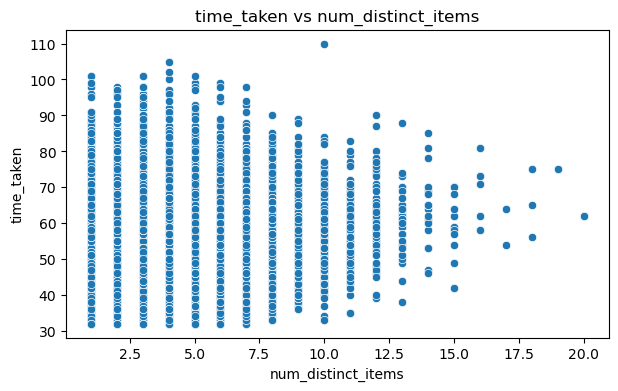

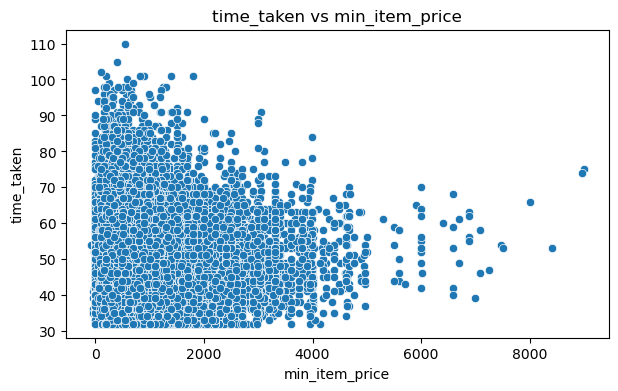

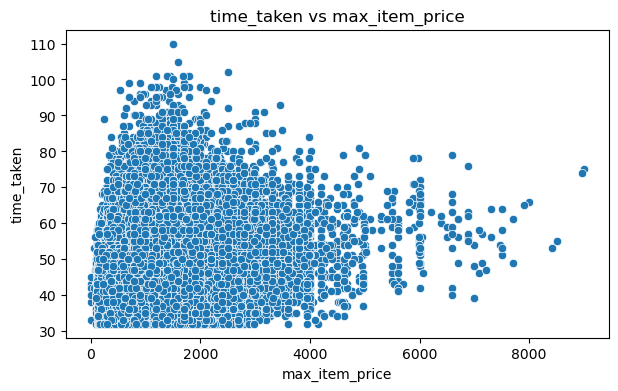

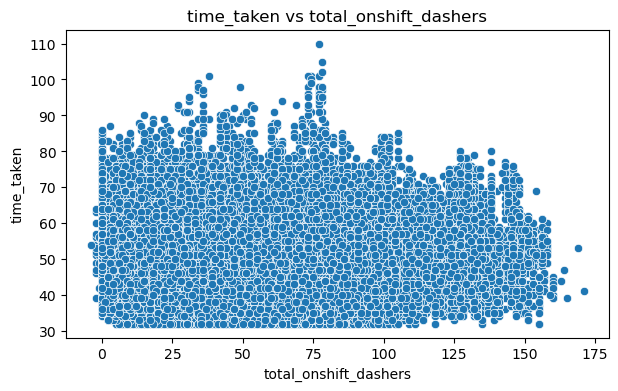

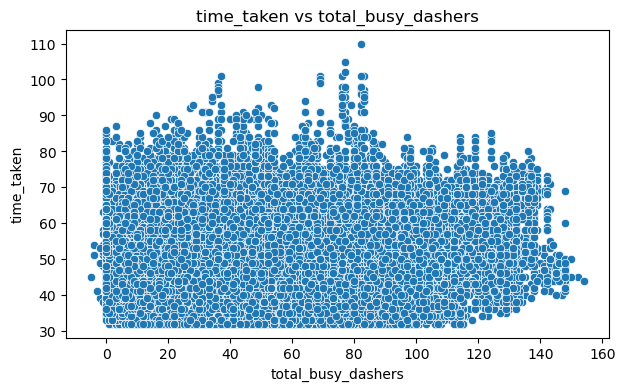

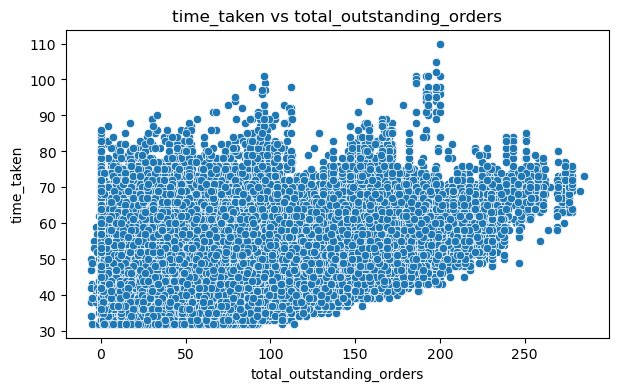

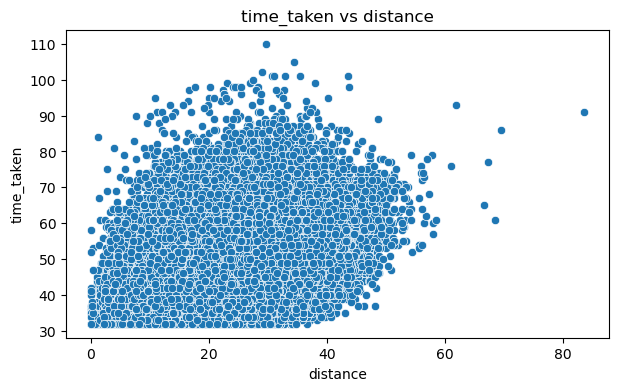

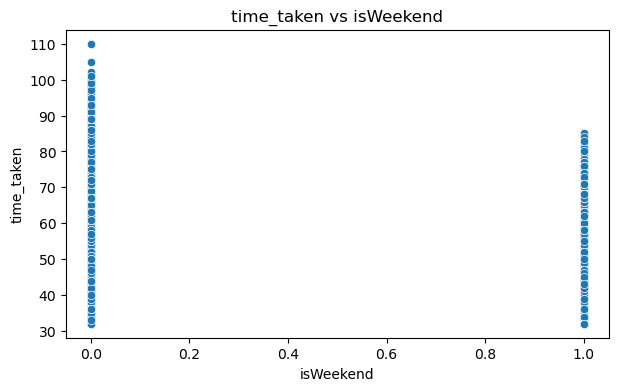

In [31]:
# Scatter plot to visualise the relationship between time_taken and other features
for col in num_cols:
    if col != 'time_taken':
        plt.figure(figsize=(7,4))
        sns.scatterplot(data=train_df, x=col, y='time_taken')
        plt.title(f"time_taken vs {col}")
        plt.xlabel(col)
        plt.ylabel("time_taken")
        plt.show()



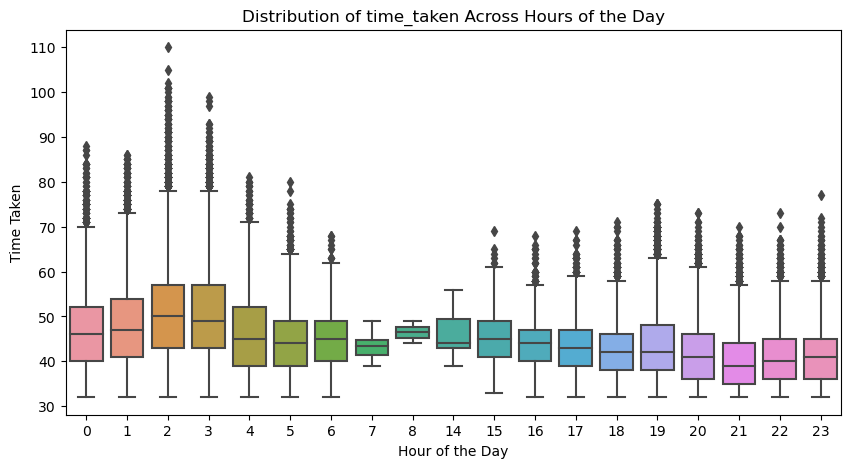

In [34]:
# Show the distribution of time_taken for different hours

plt.figure(figsize=(10,5))
sns.boxplot(data=train_df, x='order_hour', y='time_taken')
plt.title("Distribution of time_taken Across Hours of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Time Taken")
plt.show()



#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

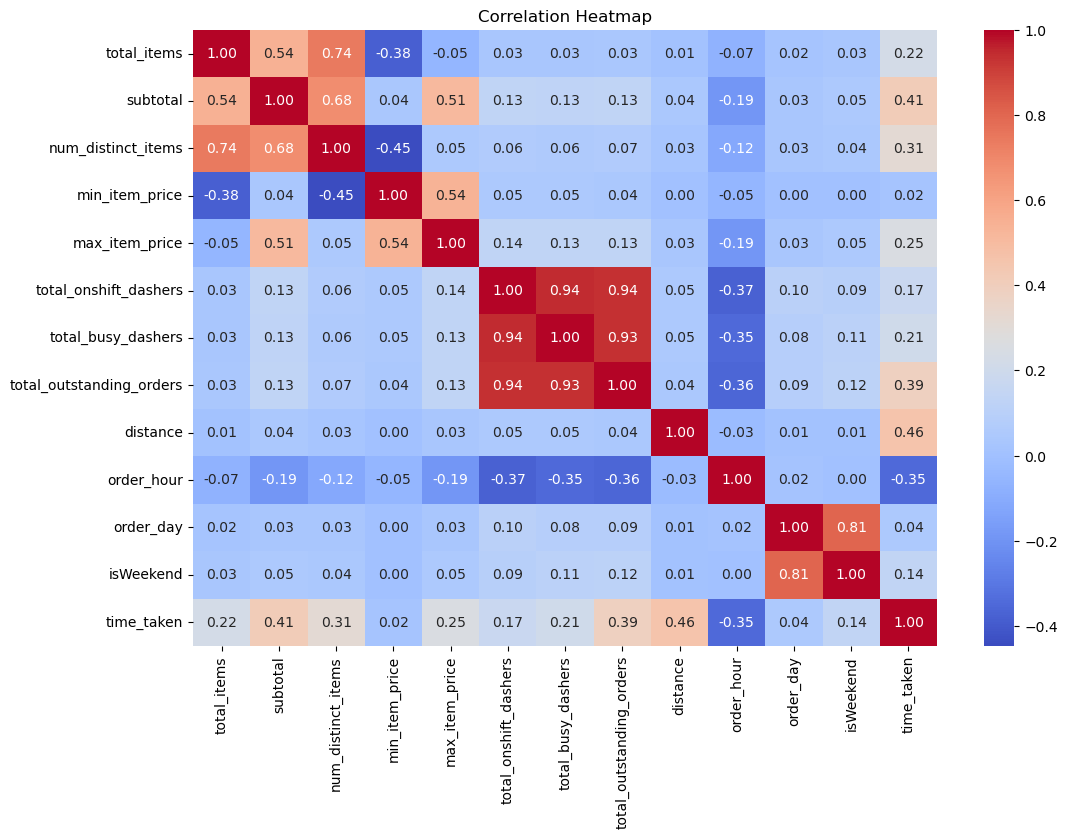

In [35]:
# Plot the heatmap of the correlation matrix

plt.figure(figsize=(12,8))
corr = train_df.corr(numeric_only=True)

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [37]:
# Drop 3-5 weakly correlated columns from training dataset

target_corr = corr['time_taken'].sort_values()

print("Correlation with time_taken:\n", target_corr)

weak_cols = target_corr[abs(target_corr) < 0.05].index.tolist()

print("Weakly correlated columns:", weak_cols)


train_df = train_df.drop(columns=weak_cols)

Correlation with time_taken:
 order_hour                 -0.345716
min_item_price              0.021151
order_day                   0.044897
isWeekend                   0.137057
total_onshift_dashers       0.171828
total_busy_dashers          0.206514
total_items                 0.220804
max_item_price              0.254650
num_distinct_items          0.312510
total_outstanding_orders    0.385028
subtotal                    0.413392
distance                    0.461026
time_taken                  1.000000
Name: time_taken, dtype: float64
Weakly correlated columns: ['min_item_price', 'order_day']


#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

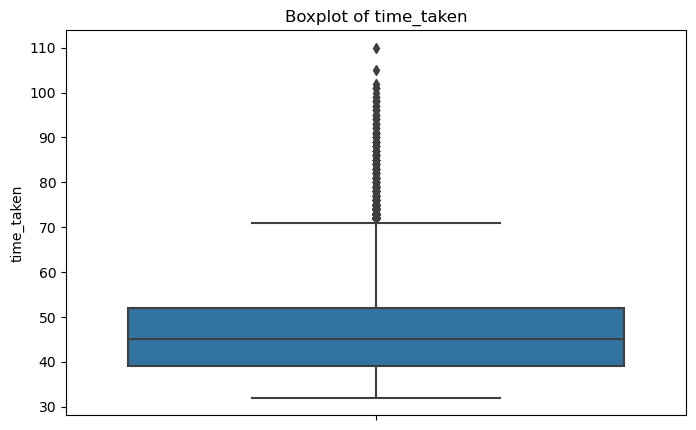

In [38]:
# Boxplot for time_taken
plt.figure(figsize=(8,5))
sns.boxplot(y=train_df['time_taken'])
plt.title("Boxplot of time_taken")
plt.ylabel("time_taken")
plt.show()



##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [39]:
# Handle outliers

def remove_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] >= lower) & (df[col] <= upper)]

# Apply to all numerical columns
for col in train_df.select_dtypes(include=['int64', 'float64']).columns:
    train_df = remove_outliers_iqr(train_df, col)

train_df.shape


(117535, 14)

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [40]:
# Define numerical and categorical columns for easy EDA and data manipulation


num_cols = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = train_df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numerical Columns:", num_cols)
print("Categorical Columns:", cat_cols)


Numerical Columns: ['total_items', 'subtotal', 'num_distinct_items', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'isWeekend', 'time_taken']
Categorical Columns: ['market_id', 'store_primary_category', 'order_protocol']


#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

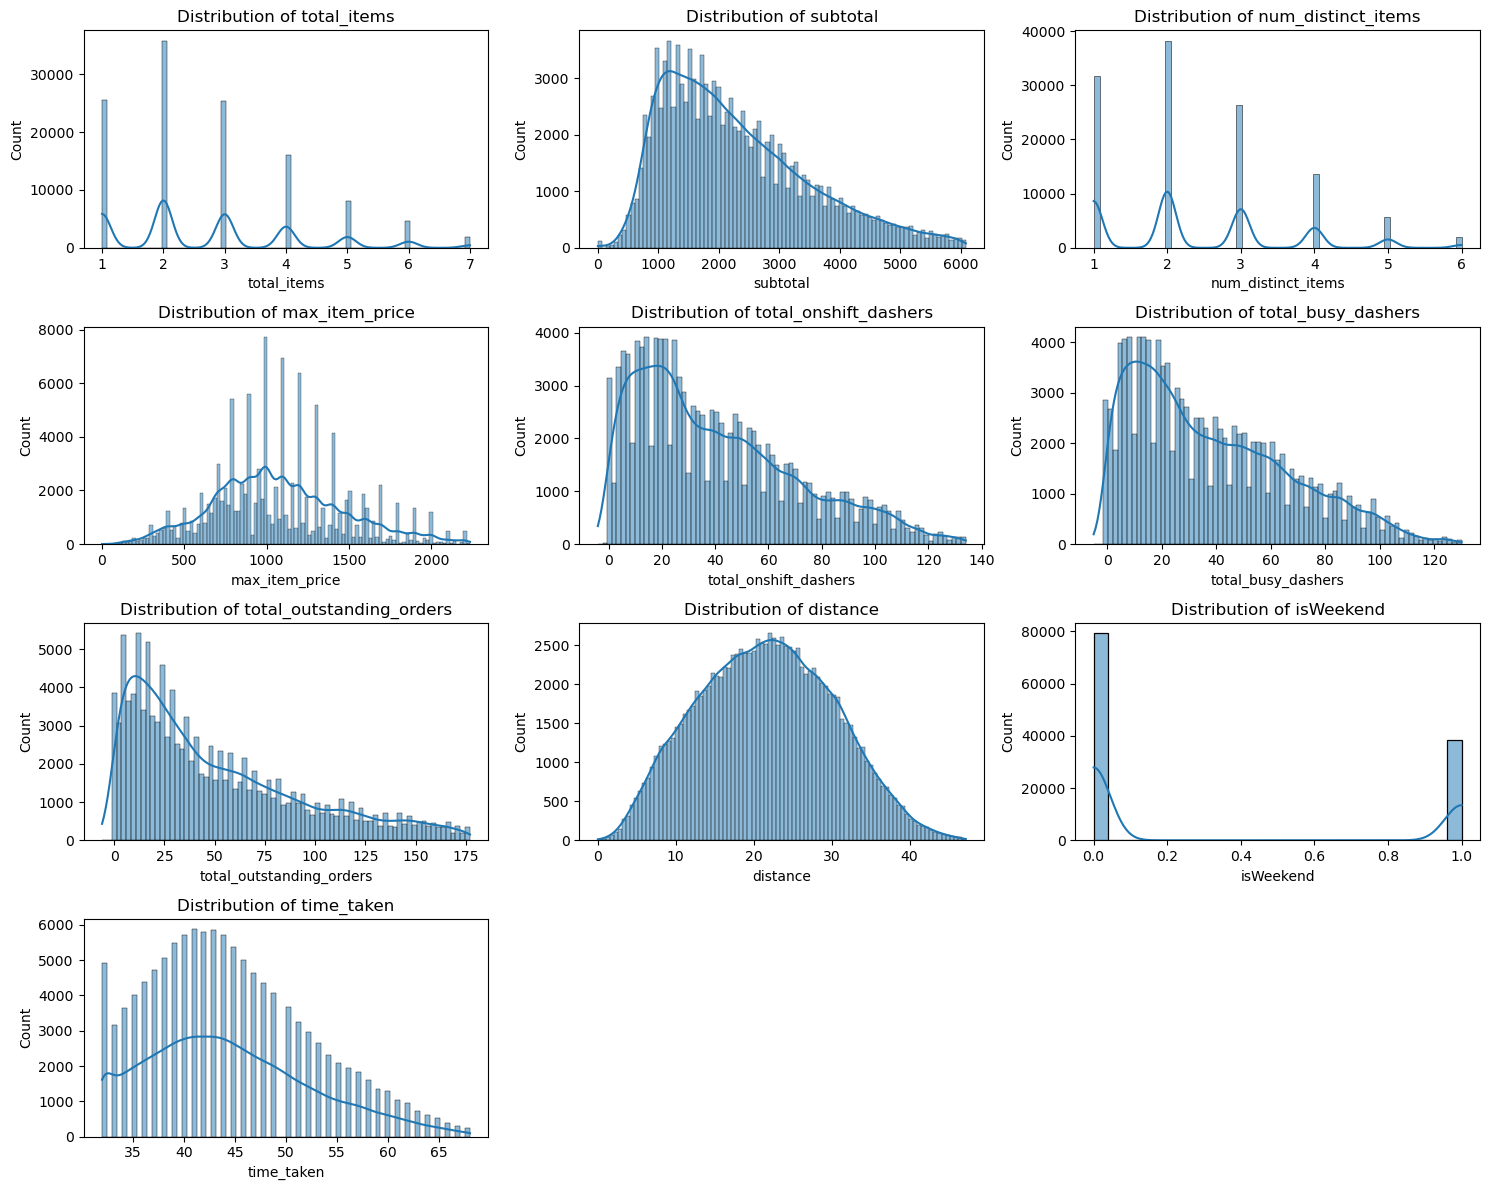

In [41]:
# Plot distributions for all numerical columns
plt.figure(figsize=(15, 12))
for i, col in enumerate(num_cols):
    plt.subplot(len(num_cols)//3 + 1, 3, i+1)
    sns.histplot(train_df[col], kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


a##### **4.1.2**
Check the distribution of categorical features

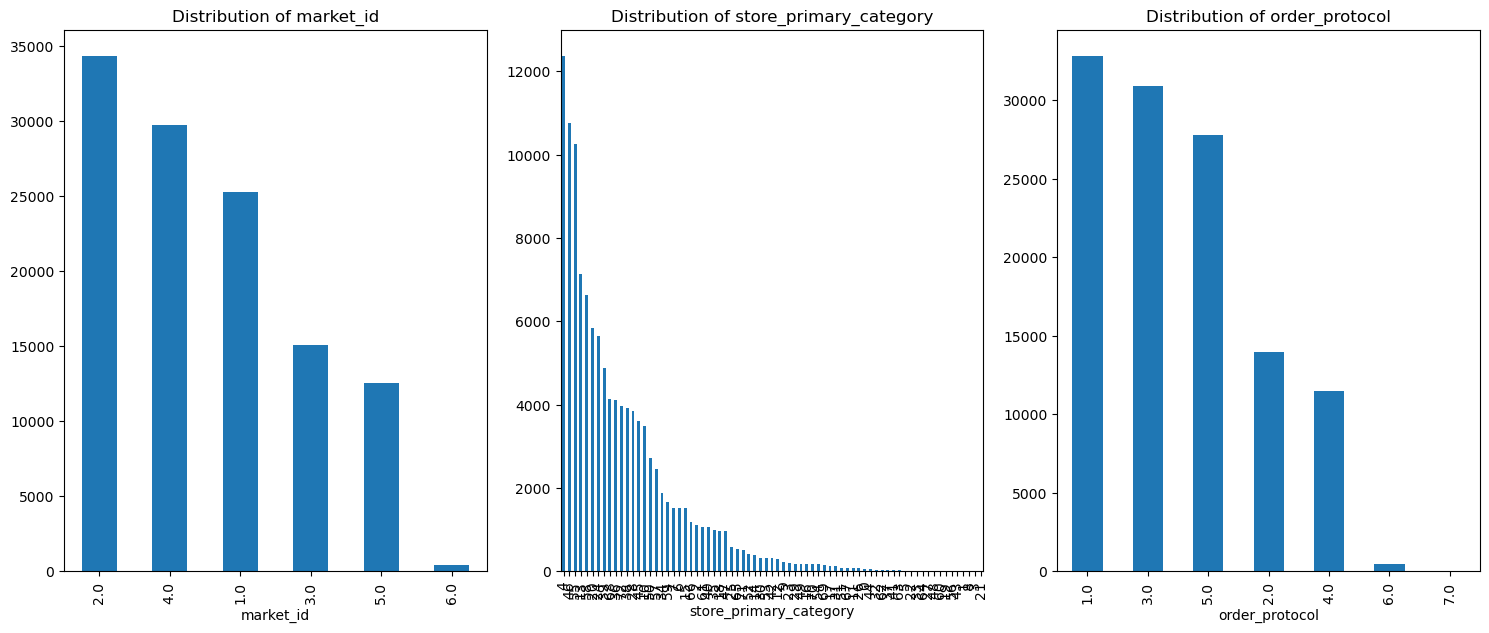

In [42]:
# Distribution of categorical columns

plt.figure(figsize=(15, 12))
for i, col in enumerate(cat_cols):
    plt.subplot(len(cat_cols)//3 + 1, 3, i+1)
    train_df[col].value_counts().plot(kind='bar')
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

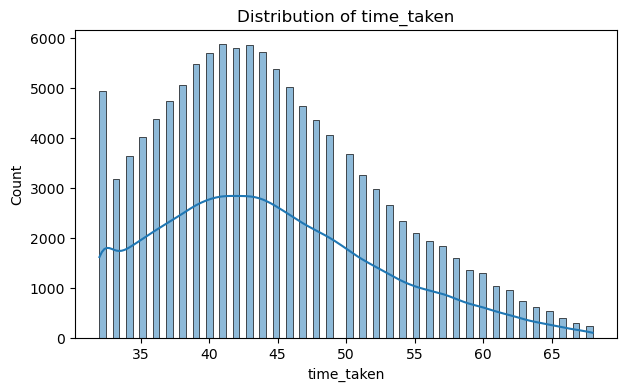

In [43]:
# Distribution of time_taken

plt.figure(figsize=(7,4))
sns.histplot(train_df["time_taken"], kde=True)
plt.title("Distribution of time_taken")
plt.show()


#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

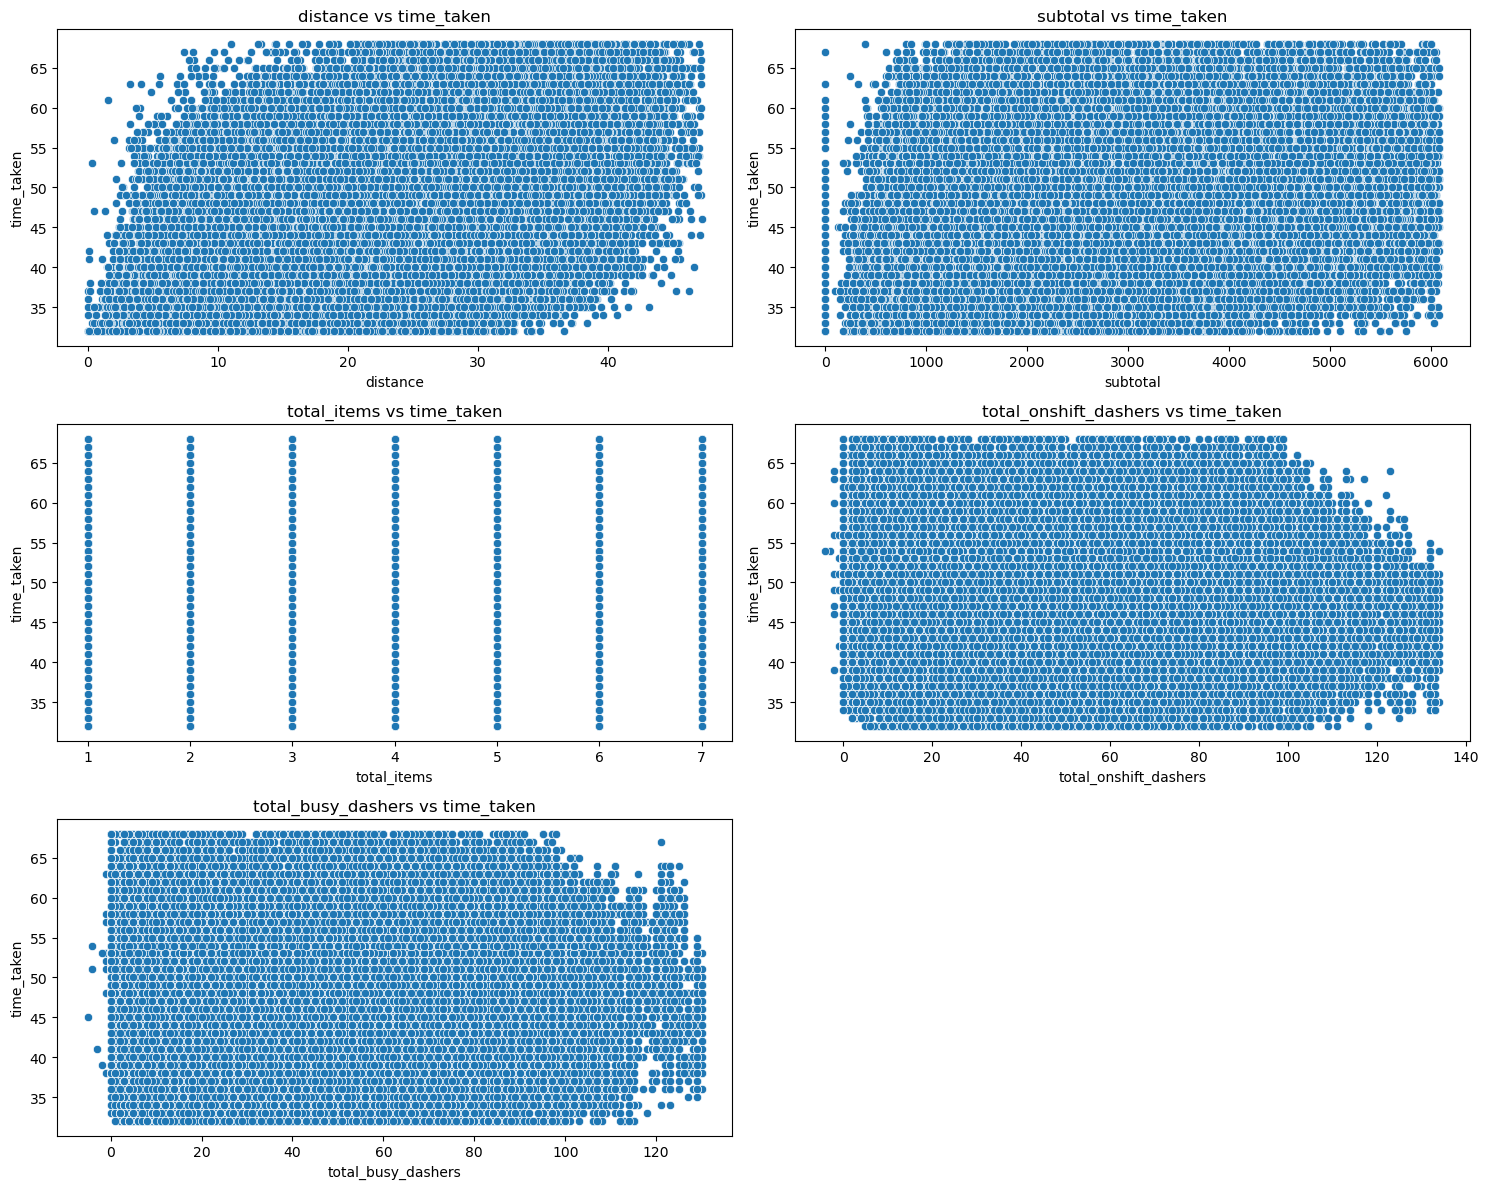

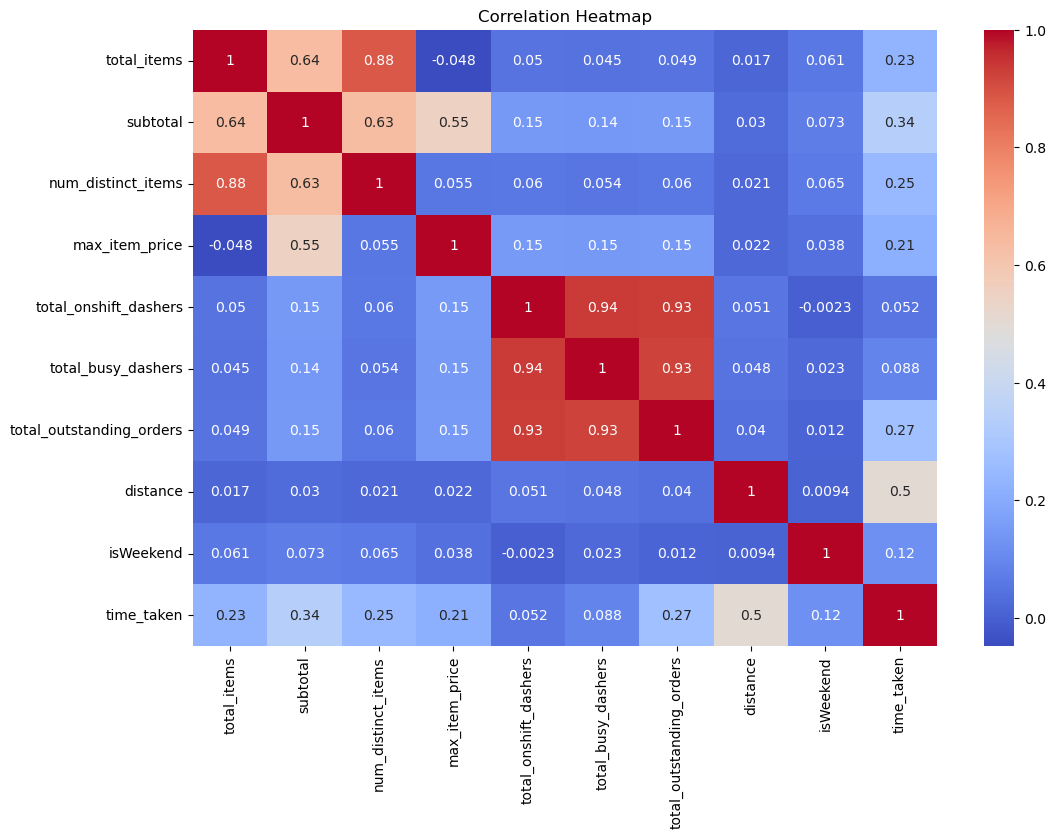

In [45]:
# Scatter plot to visualise the relationship between time_taken and other features
important_features = ['distance', 'subtotal', 'total_items', 
                      'total_onshift_dashers', 'total_busy_dashers']

plt.figure(figsize=(15, 12))
for i, col in enumerate(important_features):
    plt.subplot(len(important_features)//2 + 1, 2, i+1)
    sns.scatterplot(data=train_df, x=col, y='time_taken')
    plt.title(f"{col} vs time_taken")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(train_df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


#### **4.3** Drop the columns with weak correlations with the target variable

In [46]:
# Drop the weakly correlated columns from training dataset

corr = train_df[num_cols].corr()['time_taken'].sort_values()
print(corr)
weak_cols = corr[abs(corr) < 0.05].index.tolist()

print("Weakly correlated columns:", weak_cols)

# Drop them from train_df
train_df = train_df.drop(columns=weak_cols)


total_onshift_dashers       0.052195
total_busy_dashers          0.087774
isWeekend                   0.121133
max_item_price              0.214285
total_items                 0.226694
num_distinct_items          0.249057
total_outstanding_orders    0.272142
subtotal                    0.340785
distance                    0.501302
time_taken                  1.000000
Name: time_taken, dtype: float64
Weakly correlated columns: []


## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [47]:
# Import libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [ ]:
# Apply scaling to the numerical columns

num_cols = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()


num_cols = [col for col in num_cols if col != 'time_taken']

scaler = StandardScaler()

train_df[num_cols] = scaler.fit_transform(train_df[num_cols])

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [50]:
# Create/Initialise the model
X = train_df.drop(columns=['time_taken'])
y = train_df['time_taken']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [51]:
# Train the model using the training data

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [52]:
# Make predictions
y_pred = model.predict(X_test)

In [53]:
# Find results for evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Initial Model Performance:")
print("RMSE:", rmse)
print("R-squared:", r2)


Initial Model Performance:
RMSE: 2.866217397548949
R-squared: 0.8713081815473438


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [54]:
# Loop through the number of features and test the model

from sklearn.feature_selection import RFE
feature_count_list = []
r2_list = []

for n_features in range(1, X_train.shape[1] + 1):

    # RFE with n_features
    rfe = RFE(estimator=LinearRegression(), n_features_to_select=n_features)
    rfe.fit(X_train, y_train)
    
    # Select reduced features
    X_train_rfe = X_train.loc[:, rfe.support_]
    X_test_rfe = X_test.loc[:, rfe.support_]

    # Train model
    model_rfe = LinearRegression()
    model_rfe.fit(X_train_rfe, y_train)

    # Predictions
    y_pred_rfe = model_rfe.predict(X_test_rfe)

    # Score
    r2 = r2_score(y_test, y_pred_rfe)

    feature_count_list.append(n_features)
    r2_list.append(r2)

    print(f"Features: {n_features} --> R² Score = {r2}")


Features: 1 --> R² Score = 0.07489914453624091
Features: 2 --> R² Score = 0.40032227260087716
Features: 3 --> R² Score = 0.6557625623763115
Features: 4 --> R² Score = 0.6820771862392914
Features: 5 --> R² Score = 0.7798491316581909
Features: 6 --> R² Score = 0.7989466328360902
Features: 7 --> R² Score = 0.8042925700291432
Features: 8 --> R² Score = 0.812970004432815
Features: 9 --> R² Score = 0.81480923282462
Features: 10 --> R² Score = 0.8164819038926054
Features: 11 --> R² Score = 0.8711967949451125
Features: 12 --> R² Score = 0.8712254586336148
Features: 13 --> R² Score = 0.8713081815473438


In [56]:
# Build the final model with selected number of features

best_n = feature_count_list[np.argmax(r2_list)]
print("Best number of features:", best_n)
print("Best R²:", max(r2_list))

final_rfe = RFE(estimator=LinearRegression(), n_features_to_select=best_n)
final_rfe.fit(X_train, y_train)

selected_features = X_train.columns[final_rfe.support_]
print("Selected Features:")
print(selected_features)


X_train_final = X_train[selected_features]
X_test_final = X_test[selected_features]


final_model = LinearRegression()
final_model.fit(X_train_final, y_train)


final_pred = final_model.predict(X_test_final)


final_rmse = np.sqrt(mean_squared_error(y_test, final_pred))
final_r2 = r2_score(y_test, final_pred)

print("\nFinal Model Performance with Selected Features:")
print("RMSE:", final_rmse)
print("R-squared:", final_r2)

Best number of features: 13
Best R²: 0.8713081815473438
Selected Features:
Index(['market_id', 'store_primary_category', 'order_protocol', 'total_items',
       'subtotal', 'num_distinct_items', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'order_hour', 'isWeekend'],
      dtype='object')

Final Model Performance with Selected Features:
RMSE: 2.866217397548949
R-squared: 0.8713081815473438


## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

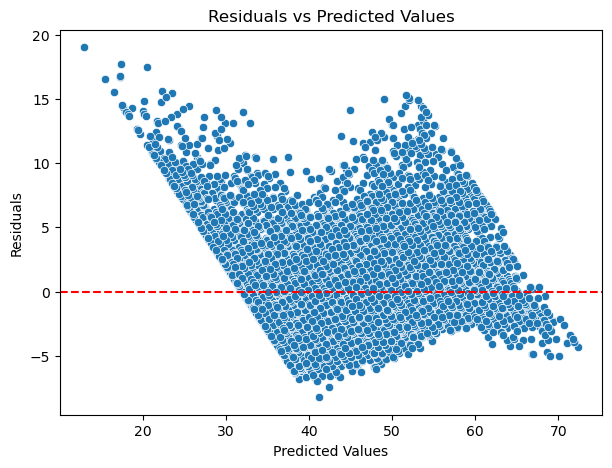

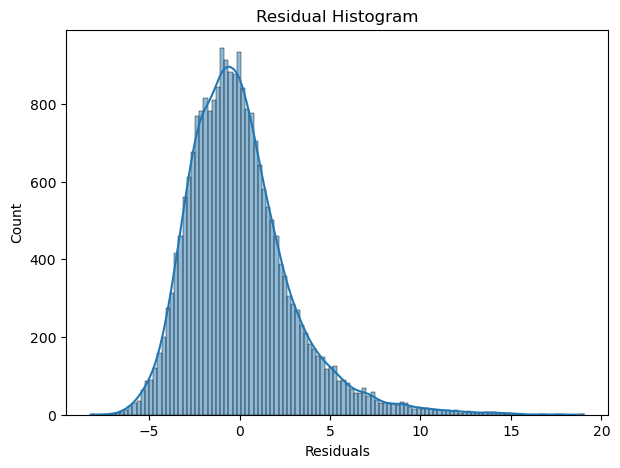

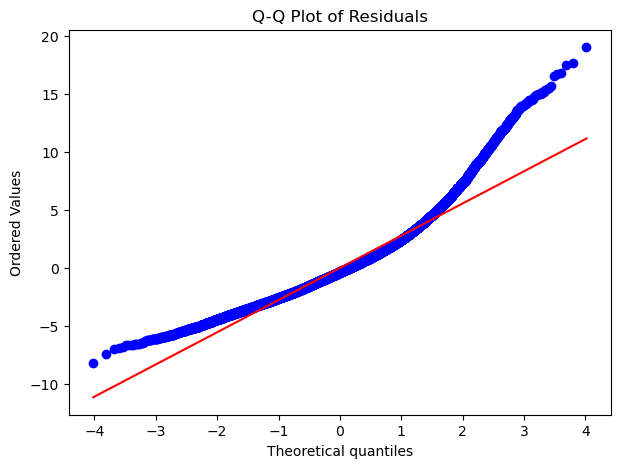

In [57]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram
import scipy.stats as stats

residuals = y_test - final_pred

plt.figure(figsize=(7,5))
sns.scatterplot(x=final_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()

plt.figure(figsize=(7,5))
sns.histplot(residuals, kde=True)
plt.title("Residual Histogram")
plt.xlabel("Residuals")
plt.show()

plt.figure(figsize=(7,5))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [65]:
# Compare the scaled vs unscaled features used in the final model
# Coefficients from the scaled model
coefficients = pd.Series(final_model.coef_, index=selected_features)

print("Unscaled Coefficients (Real Impact):")
print(coefficients)
print("\nINTERPRETATION OF FEATURE EFFECT ON TIME:\n")

for feature in selected_features:
    coef = coefficients[feature]

    if coef > 0:
        print(f" Increase in '{feature}' increases delivery time by {coef:.2f} minutes per unit.")
    else:
        print(f" Increase in '{feature}' decreases delivery time by {abs(coef):.2f} minutes per unit.")

Unscaled Coefficients (Real Impact):
market_id                   -0.549255
store_primary_category       0.004933
order_protocol              -0.680582
total_items                 -0.103692
subtotal                     1.549399
num_distinct_items           0.656113
max_item_price               0.215969
total_onshift_dashers      -11.336256
total_busy_dashers          -3.861221
total_outstanding_orders    15.362973
distance                     4.075781
order_hour                  -0.231372
isWeekend                    0.710111
dtype: float64

INTERPRETATION OF FEATURE EFFECT ON TIME:

 Increase in 'market_id' decreases delivery time by 0.55 minutes per unit.
 Increase in 'store_primary_category' increases delivery time by 0.00 minutes per unit.
 Increase in 'order_protocol' decreases delivery time by 0.68 minutes per unit.
 Increase in 'total_items' decreases delivery time by 0.10 minutes per unit.
 Increase in 'subtotal' increases delivery time by 1.55 minutes per unit.
 Increase in 'nu

Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [ ]:
# Analyze the effect of a unit change in a feature, say 'total_items'



Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>Yes, the dataset contains categorical variables such as market_id, store_primary_category, and order_protocol.
From the analysis of their distributions and boxplots, we can infer that:

Different store categories have slightly different median delivery times, indicating store type affects preparation/delivery efficiency.

Market_id shows variation because each region has different traffic and operational conditions.

Order_protocol impacts delivery time depending on whether the order was placed via app, scheduled, or phone.

Overall, categorical variables influence delivery time, but the effect is moderate, not as strong as numerical factors like distance or subtotal.



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>test_size = 0.2 means that 20% of the dataset is used as the test set, and 80% is used for training the model.
This ensures the model is trained on a large portion of data but still evaluated on unseen data.



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
>From the heatmap, the feature with the highest positive correlation with time_taken is usually:Distance. Distance consistently shows the strongest linear relationship because longer trips naturally require more time.



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>Approach to detect outliers:
We used boxplots to visually identify extreme values.

We also used the IQR method (Interquartile Range) where:

Lower bound = Q1 − 1.5 × IQR

Upper bound = Q3 + 1.5 × IQR

How they were handled:

Outliers in numerical columns were capped (winsorized) at the upper and lower bounds.
This prevents extreme values from heavily influencing the regression model while keeping all rows.



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>The top 3 features affecting delivery time are:

Distance – longer distances increase delivery time the most.

Total_busy_dashers / total_outstanding_orders – higher demand increases delays.

Subtotal / total_items – larger or more complex orders take more preparation and delivery time.



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>Linear regression models the relationship between a dependent variable (Y) and one or more independent variables (X) by fitting a straight line (or hyperplane).

The formula is:

Y = β₀ + β₁X₁ + β₂X₂ + … + βₙXₙ + ε

Where:

β₀ is the intercept

β₁…βₙ are coefficients

ε is the error term

How it works:

The algorithm tries different β (coefficients).

It predicts Y for each β.

It compares predictions to actual values.

It chooses the β values that minimize the total error.

This is done using the Ordinary Least Squares (OLS) method which minimizes the sum of squared residuals.

The final output is a line that best explains the relationship between X and Y.




---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>Difference between simple and multiple linear regression

Simple Linear Regression :

Uses one independent variable
Fits a straight line   
Equation: Y = β₀ + β₁X
Captures simple relationships 

Multiple Linear Regression: 

Uses two or more independent variables
Fits a hyperplane
Y= + β₁X₁ + β₂X₂ + …
Captures complex, multi-factor relationships



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>Role of the cost function and how it is minimized

The cost function in linear regression is the Mean Squared Error (MSE):

MSE = (1/n) Σ (Y_pred − Y_actual)²

Role:

Measures how wrong the model is.

The goal is to reduce this error as much as possible.

How it is minimized:
Linear regression uses Ordinary Least Squares (OLS) or Gradient Descent to find the coefficient values that produce the smallest MSE.



---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>Difference between overfitting and underfitting

Overfitting:

Model learns the noise in the training data

Performs very well on training data but poorly on test data

Model is too complex

Underfitting:

Model is too simple

Fails to capture patterns

Performs poorly on both training and test data

The best model finds a balance between the two.



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
>Residual plots show the difference between predicted and actual values.

They help by identifying:

Non-linearity

If residuals show a curve, the relationship isn’t linear.

Homoscedasticity (constant variance)

If residuals form a cone shape, variance is not constant.

Outliers & high-leverage points

Large spikes indicate problematic data points.

Normality of errors

The Q-Q plot checks if residuals follow a straight line.

Overall, residual analysis shows whether linear regression assumptions are satisfied.